In [58]:
import lightning 
from src.models.view_invariant import ViewInvariantEmbeddingModule
import torch
from pathlib import Path
from src.utils.visualize import save_matrix_png
import matplotlib.pyplot as plt
from torchmetrics.functional.pairwise import pairwise_cosine_similarity

In [86]:
def plot(sim, type: str = 'mean'):
    plt.figure(figsize=(10, 10))
    plt.imshow(sim, cmap='hot', interpolation='nearest')
    if type == 'mean':
        plt.title('Mean Cosine Similarity')
    else: 
        plt.title('Std Cosine Similarity')
        plt.clim(0, 0.4) 
    plt.colorbar()

In [74]:
model = ViewInvariantEmbeddingModule.load_from_checkpoint('/root/multiview-robust-clip/logs/train/runs/2024-05-27_19-54-58/mvc-clip/jexxpqo7/checkpoints/epoch=99-step=100.ckpt')
model.eval()

/root/miniconda3/envs/mvc/lib/python3.8/site-packages/lightning/pytorch/utilities/parsing.py:197: UserWarning: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
  rank_zero_warn(


ViewInvariantEmbeddingModule(
  (net): VLMHead(
    (model): Sequential(
      (linear0): Linear(in_features=512, out_features=512, bias=True)
      (activation0): ReLU()
      (linear1): Linear(in_features=512, out_features=512, bias=True)
      (activation1): ReLU()
      (linear2): Linear(in_features=512, out_features=512, bias=True)
    )
  )
  (loss): LossObjectSimilarity()
)

In [90]:
x = torch.randn(1, 37, 512)

out = model.forward(x)

In [47]:
path = "/root/multiview-robust-clip/data/objaverse/renderings/0a087dd484fe4bcca15059864630544e"

import os
import glob

pt_files = sorted(glob.glob(os.path.join(path, '*.pt')))
tensor_list = [torch.load(file) for file in pt_files]
tensor = torch.stack(tensor_list)

images = tensor[:36]
text = tensor[36]

In [92]:
pairwise_cosine_similarity(x.squeeze())

tensor([[ 0.0000,  0.0634,  0.0504,  ...,  0.0678,  0.0150, -0.0175],
        [ 0.0634,  0.0000,  0.0319,  ..., -0.0135,  0.0436,  0.0068],
        [ 0.0504,  0.0319,  0.0000,  ..., -0.0357,  0.0375, -0.0373],
        ...,
        [ 0.0678, -0.0135, -0.0357,  ...,  0.0000, -0.0666,  0.0814],
        [ 0.0150,  0.0436,  0.0375,  ..., -0.0666,  0.0000, -0.0618],
        [-0.0175,  0.0068, -0.0373,  ...,  0.0814, -0.0618,  0.0000]])

In [91]:
pairwise_cosine_similarity(out.squeeze())

tensor([[0.0000, 0.9549, 0.9503,  ..., 0.9446, 0.9490, 0.9502],
        [0.9549, 0.0000, 0.9494,  ..., 0.9484, 0.9495, 0.9480],
        [0.9503, 0.9494, 0.0000,  ..., 0.9535, 0.9503, 0.9483],
        ...,
        [0.9446, 0.9484, 0.9535,  ..., 0.0000, 0.9503, 0.9371],
        [0.9490, 0.9495, 0.9503,  ..., 0.9503, 0.0000, 0.9319],
        [0.9502, 0.9480, 0.9483,  ..., 0.9371, 0.9319, 0.0000]],
       grad_fn=<CopySlices>)

In [76]:
out = model.forward(images.unsqueeze(0)).squeeze()
all_after = torch.cat((out, text.unsqueeze(0)), dim=0)
all_before = torch.cat((images, text.unsqueeze(0)), dim=0)

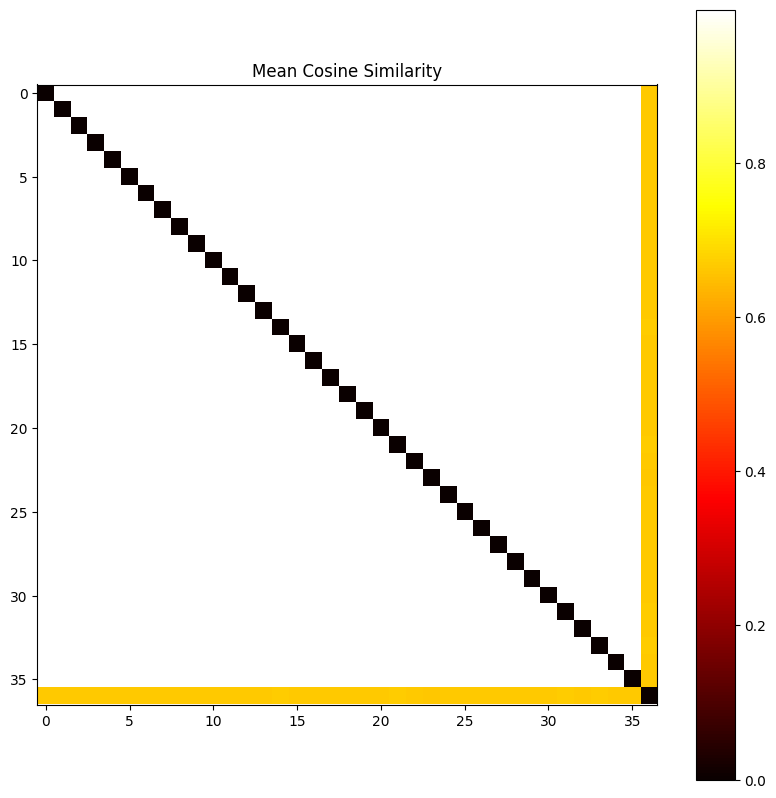

In [88]:
plot(pairwise_cosine_similarity(all_after).detach().numpy())

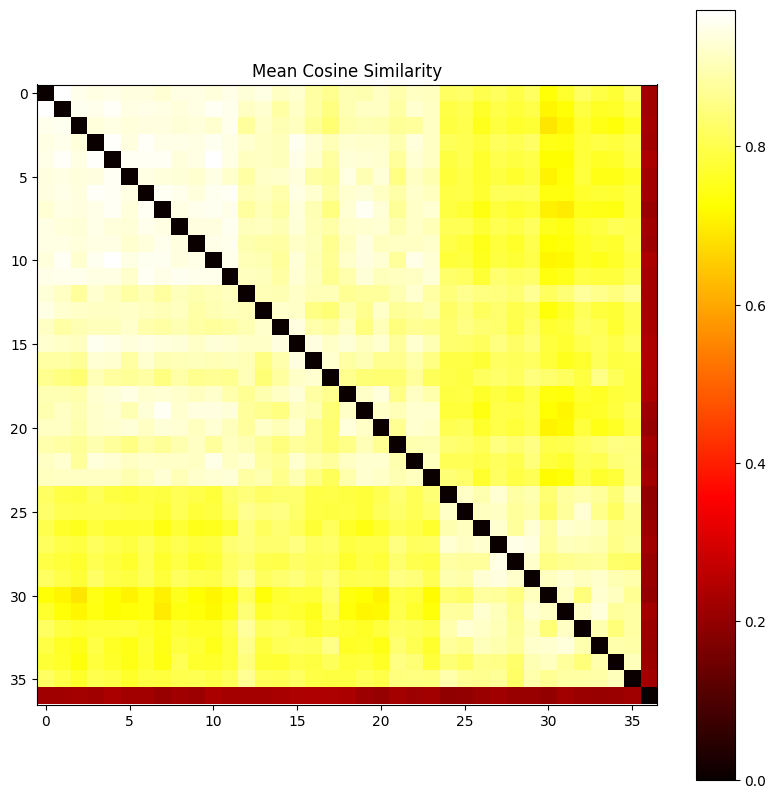

In [87]:
plot(pairwise_cosine_similarity(all_before).detach().numpy())